# Analytics Vidhya Competition
## Janata Hack Machine Learning for Banking

**Data Point**

| Variable | Description |
|----------|-------------|
| Loan_ID | A unique id for the loan. |
| Loan_Amount_Requested | The listed amount of the loan applied for by the borrower. |
| Length_Employed | Employment length in years. |
| Home_Owner | The home ownership status provided by the borrower during registration. Values are: Rent, Own, Mortgage, Other.|
| Annual_Income | The annual income provided by the borrower during registration. |
| Income_Verified | Indicates if income was verified, not verified, or if the income source was verified. |
| Purpose_Of_Loan | A category provided by the borrower for the loan request. |
| Debt_To_Income | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, divided by the borrower’s self-reported monthly income. |
| Inquiries_Last_6Mo | The number of inquiries by creditors during the past 6 months. |
| Months_Since_Deliquency | The number of months since the borrower's last delinquency. |
| Number_Open_Accounts | The number of open credit lines in the borrower's credit file. |
| Total_Accounts | The total number of credit lines currently in the borrower's credit file. |
| Gender | Gender |
| Interest_Rate | Target Variable: Interest Rate category (1/2/3) of the loan application |

**The Objective**

The process, defined as ‘risk-based pricing’, uses a sophisticated algorithm that leverages different determining factors of a loan applicant. Selection of significant factors will help develop a prediction algorithm which can estimate loan interest rates based on clients’ information. On one hand, knowing the factors will help consumers and borrowers to increase their credit worthiness and place themselves in a better position to negotiate for getting a lower interest rate. On the other hand, this will help lending companies to get an immediate fixed interest rate estimation based on clients information. Here, your goal is to use a training dataset to predict the loan rate category (1 / 2 / 3) that will be assigned to each loan in our test set

### 1. Data Collection

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train_fNxu4vz.csv')

In [3]:
print(train.shape)
train.head()

(164309, 14)


,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

---

### 2. Data Wrangling

In [5]:
train.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

In [7]:
iter_impute = IterativeImputer(random_state=23, min_value=0, n_nearest_features=5)
cols = ['Months_Since_Deliquency','Annual_Income']
train[cols] = iter_impute.fit_transform(train[cols])

In [8]:
train['Months_Since_Deliquency'] = round(train['Months_Since_Deliquency'],0)
train['Annual_Income'] = round(train['Annual_Income'],1)

In [9]:
simple_impute = SimpleImputer(strategy='most_frequent')
cols2 = ['Length_Employed','Home_Owner']
train[cols2] = simple_impute.fit_transform(train[cols2])

In [10]:
train['Loan_Amount_Requested'] = train['Loan_Amount_Requested'].apply(lambda x: x.replace(',','')).astype(int)

In [11]:
train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000,< 1 year,Rent,68000.0,not verified,car,18.37,0,34.0,9,14,Female,1
1,10000002,30000,4 years,Mortgage,78737.0,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,24725,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,34.0,12,16,Male,3
3,10000004,16000,< 1 year,Mortgage,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,35.0,16,22,Male,3
4,10000005,17000,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,34.0,19,30,Female,1


---

In [12]:
df = train.copy()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  int32  
 2   Length_Employed          164309 non-null  object 
 3   Home_Owner               164309 non-null  object 
 4   Annual_Income            164309 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  164309 non-null  float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [14]:
df.describe()

,Loan_ID,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,164309.00000,1.643090e+05,164309.000000,164309.000000,164309.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,14349.33692,7.333064e+04,17.207189,0.781698,34.285018,11.193818,25.067665,2.158951
std,4.743207e+04,8281.86870,5.560366e+04,7.845083,1.034747,14.811822,4.991813,11.583067,0.738364
min,1.000000e+07,500.00000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,8000.00000,4.856800e+04,11.370000,0.000000,32.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,12075.00000,6.900000e+04,16.840000,0.000000,34.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,20000.00000,8.250000e+04,22.780000,1.000000,35.000000,14.000000,32.000000,3.000000
max,1.016431e+07,35000.00000,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


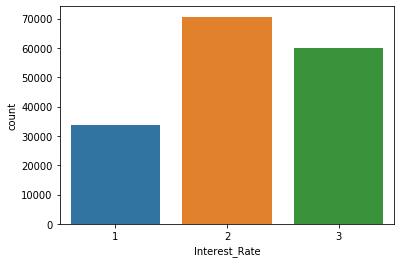

In [15]:
sns.countplot(x='Interest_Rate',data=df)
plt.show()

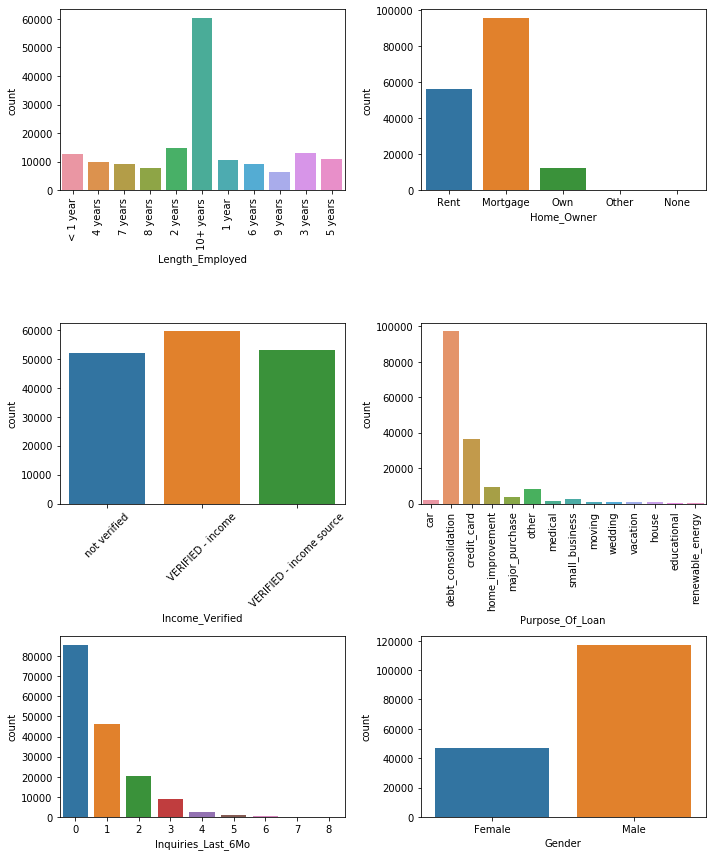

In [16]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(10,12))
LE = sns.countplot(x='Length_Employed',data=df,ax=ax[0,0])
LE.set_xticklabels(LE.get_xticklabels(),rotation=90)
sns.countplot(x='Home_Owner',data=df,ax=ax[0,1])
IV = sns.countplot(x='Income_Verified',data=df,ax=ax[1,0])
IV.set_xticklabels(IV.get_xticklabels(),rotation=45)
POL = sns.countplot(x='Purpose_Of_Loan',data=df,ax=ax[1,1])
POL.set_xticklabels(POL.get_xticklabels(),rotation=90)
sns.countplot(x='Inquiries_Last_6Mo',data=df,ax=ax[2,0])
sns.countplot(x='Gender',data=df,ax=ax[2,1])
plt.tight_layout()
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
encode = LabelEncoder()
col = ['Length_Employed','Home_Owner','Income_Verified','Purpose_Of_Loan','Inquiries_Last_6Mo','Gender']
df[col] = df[col].apply(encode.fit_transform)

In [19]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000,10,4,68000.0,2,0,18.37,0,34.0,9,14,0,1
1,10000002,30000,4,0,78737.0,0,2,14.93,0,17.0,12,24,0,3
2,10000003,24725,7,0,75566.4,1,2,15.88,0,34.0,12,16,1,3
3,10000004,16000,10,0,56160.0,1,2,14.34,3,35.0,16,22,1,3
4,10000005,17000,8,3,96000.0,1,2,22.17,1,34.0,19,30,0,1


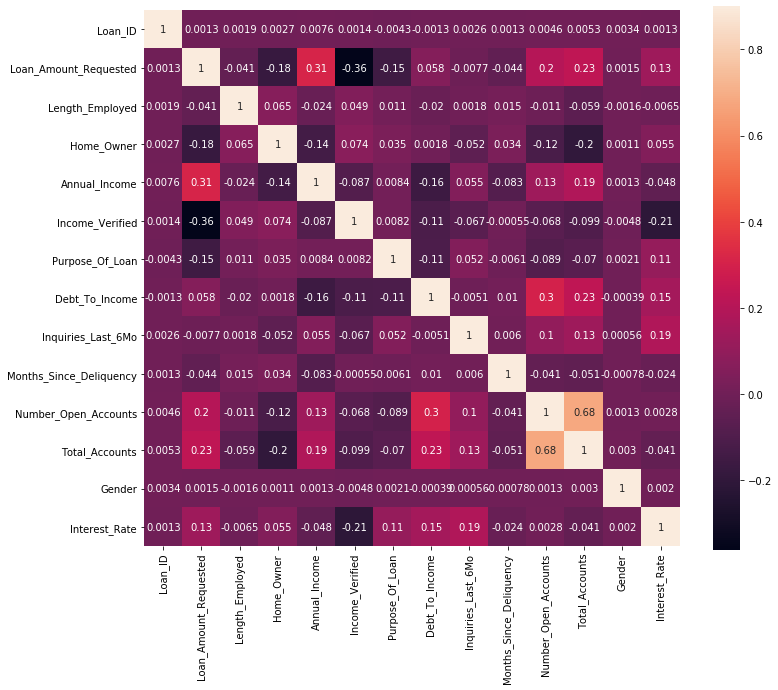

In [20]:
cor = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor,vmax=0.9,square=True,annot=True)
plt.show()

---

### 3. Data Modelling

In [21]:
x = df.drop(['Loan_ID','Interest_Rate'],axis=1)
y = df['Interest_Rate']

In [22]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import f1_score

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [25]:
fold = StratifiedKFold(n_splits=10,shuffle=True)
def f1w(model):
    return cross_val_score(model,x_train,y_train,cv=fold,scoring='f1_weighted').mean()

In [26]:
#Model 1 : Logistic Regression
logreg = LogisticRegression(solver='liblinear')
print('Score of Logistic Regression Model is: ',f1w(logreg))

#Model 2 : Decision Tree
dt = DecisionTreeClassifier()
print('Score of Decision Tree Model is: ',f1w(dt))

Score of Logistic Regression Model is:  0.40603906402696743
Score of Decision Tree Model is:  0.43209533282649604


In [27]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [28]:
#Model 1: Ada Boost
ada = AdaBoostClassifier()
print('Score of AdaBoost Model is: ',f1w(ada))

#Model 2: Random Forest
rf = RandomForestClassifier()
print('Score of Random Forest Model is: ',f1w(rf))

#Model 3: Gradient Boost
gbm = GradientBoostingClassifier()
print('Score of Gradient Boost Model is: ',f1w(gbm))

#Model 4: XGBoost
xgb = XGBClassifier()
print('Score of XGBoost Model is: ',f1w(xgb))

Score of AdaBoost Model is:  0.5132517981920734
Score of Random Forest Model is:  0.5073802277853271
Score of Gradient Boost Model is:  0.5155873291047407
Score of XGBoost Model is:  0.5312230356048971


**Test Model**

In [29]:
xgb.fit(x_train,y_train)
print(f1_score(y_test,xgb.predict(x_test),average='weighted'))

0.5251721485871154


**Fit Using All Data**

In [30]:
xgb.fit(x,y)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

### Predict Unseen Data

In [31]:
test = pd.read_csv('test_fjtUOL8.csv')
sample = pd.read_csv('sample_submission_HSqiq1Q.csv')

In [32]:
print(test.shape)
test.head()

(109541, 13)


,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [33]:
test.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             4936
Home_Owner                 16711
Annual_Income              16898
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    58859
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
dtype: int64

In [34]:
iter_impute = IterativeImputer(random_state=23, min_value=0, n_nearest_features=5)
col_t1 = ['Months_Since_Deliquency','Annual_Income']
test[col_t1] = iter_impute.fit_transform(test[col_t1])
test['Months_Since_Deliquency'] = round(test['Months_Since_Deliquency'],0)
test['Annual_Income'] = round(test['Annual_Income'],1)

simple_impute = SimpleImputer(strategy='most_frequent')
col_t2 = ['Length_Employed','Home_Owner']
test[col_t2] = simple_impute.fit_transform(test[col_t2])

test['Loan_Amount_Requested'] = test['Loan_Amount_Requested'].apply(lambda x: x.replace(',','')).astype(int)

In [35]:
col_en = ['Length_Employed','Home_Owner','Income_Verified','Purpose_Of_Loan','Inquiries_Last_6Mo','Gender']
test[col] = test[col].apply(encode.fit_transform)

In [36]:
test.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,27500,1,0,129000.0,0,2,12.87,0,68.0,10,37,1
1,10164311,26000,1,0,110000.0,2,1,11.37,0,33.0,6,23,1
2,10164312,6075,10,4,75000.0,0,2,6.83,2,34.0,5,20,1
3,10164313,12000,1,0,73000.0,1,2,7.76,0,34.0,6,8,1
4,10164314,35000,10,0,156000.0,2,2,9.62,0,26.0,9,21,1


In [37]:
sample.head()

,Loan_ID,Interest_Rate
0,10164310,1
1,10164311,1
2,10164312,1
3,10164313,1
4,10164314,1


In [39]:
val_xgb = xgb.predict(test.drop('Loan_ID',axis=1))

In [41]:
sample['Interest_Rate'] = val_xgb
sample.head()

,Loan_ID,Interest_Rate
0,10164310,2
1,10164311,2
2,10164312,3
3,10164313,2
4,10164314,2


In [42]:
sample.to_csv('submission_XGBoost.csv',index=False)